## This notebook demonstrates nice visual intuitions about change of bases, using rotation and reflection matrices;

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(["ggplot", "dark_background"])
np.random.seed(42)

Original coordinates of $b$ are 2 steps in $x$ dimension and 3 steps in $y$ dimension w.r.t. standard basis of $\mathbb{R}^2$.

In [2]:
# 2 steps in x dimension and 3 steps in y dimension of standard basis of R^2
b = np.array([2., 3.]).reshape(-1, 1)

Plot $b$ with respect to its coordinates in the standard basis of $\mathbb{R}^2$.

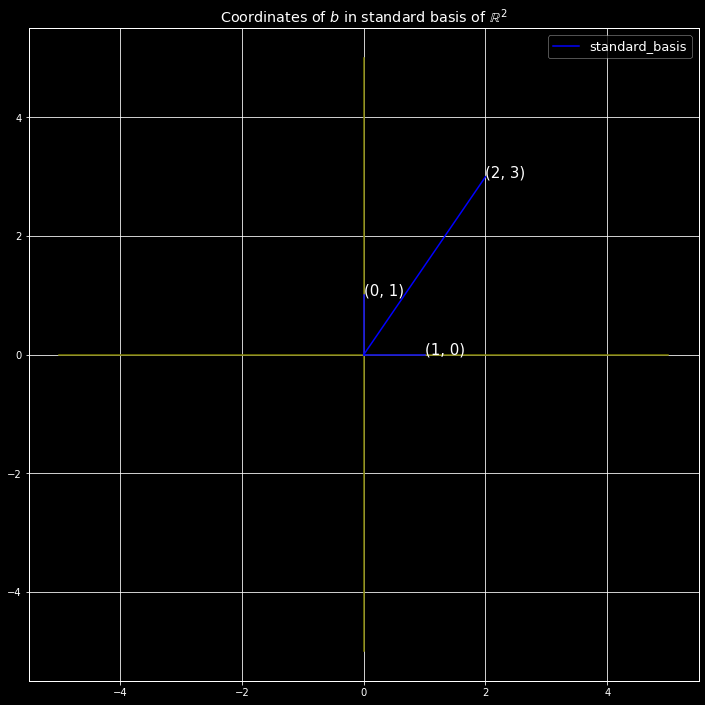

In [3]:
fig, ax = plt.subplots(figsize=(12, 12))
# standard basis axes;
ax.plot([0, 0], [-5, 5], color='olive')
ax.plot([-5, 5], [0, 0], color='olive')
# coordinates of b w.r.t. standard basis coordinates;
ax.plot([0, 0], [0, 1], color="blue", label="standard_basis")
ax.plot([0, 1], [0, 0], color="blue")
ax.plot([0, 2], [0, 3], color="blue")
ax.annotate(text="(0, 1)", xy=(0, 1), size=15)
ax.annotate(text="(1, 0)", xy=(1, 0), size=15)
ax.annotate(text="(2, 3)", xy=(2, 3), size=15)
ax.set_title("Coordinates of $b$ in standard basis of $\mathbb{R}^2$")
ax.legend(fontsize=13)
plt.show()

### Rotation;

In [4]:
R1 = np.empty((len(b), len(b)))
R1[0, 0] = np.cos(np.pi/4)
R1[1, 0] = np.sin(np.pi/4)
R1[1, 1] = np.cos(np.pi/4)
R1[0, 1] = - np.sin(np.pi/4)

Now do anti-clockwise rotation of the standard basis by $\pi/4$ degrees.

In [5]:
R1_inv = np.linalg.inv(R1)
rotated_x = R1[:, 0]
rotated_y = R1[:, 1]
b_new_coordinates = R1_inv @ b

### Check out the coordinates of $b$ in rotated coordinate system;

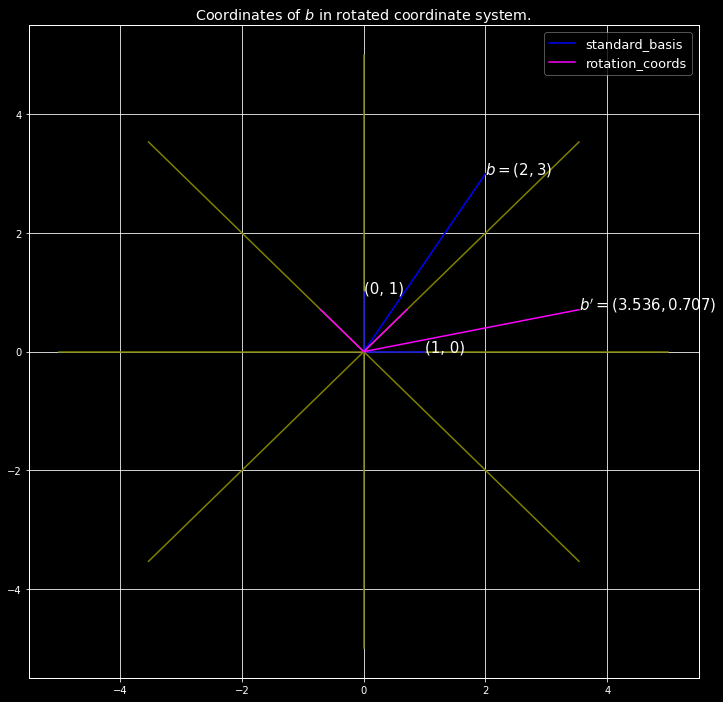

In [6]:
fig, ax = plt.subplots(figsize=(12, 12))
# original coordinates of b;
ax.plot([0, 0], [-5, 5], color="olive")
ax.plot([-5, 5], [0, 0], color="olive")
ax.plot([0, 0], [0, 1], color="blue", label="standard_basis")
ax.plot([0, 1], [0, 0], color="blue")
ax.plot([0, 2], [0, 3], color="blue")
ax.annotate(text="(0, 1)", xy=(0, 1), size=15)
ax.annotate(text="(1, 0)", xy=(1, 0), size=15)
ax.annotate(text="$b=(2, 3)$", xy=(2, 3), size=15)

# rotating the axes (making a new coordinate system);
ax.plot([-np.sin(np.pi/4)*5, np.sin(np.pi/4)*5], 
        [np.cos(np.pi/4)*5, -np.cos(np.pi/4)*5], color="olive")
ax.plot([-np.cos(np.pi/4)*5, np.cos(np.pi/4)*5], 
        [-np.sin(np.pi/4)*5, np.sin(np.pi/4)*5], color="olive")
# representing the coordinates of b in the new coordinate system;
ax.plot([0, rotated_x[0]], [0, rotated_x[1]], color="magenta", label="rotation_coords")
ax.plot([0, rotated_y[0]], [0, rotated_y[1]], color="magenta")
ax.plot([0, b_new_coordinates[0][0]], [0, b_new_coordinates[1][0]], color="magenta")
ax.annotate(f"$b'={b_new_coordinates[0][0].round(3), b_new_coordinates[1][0].round(3)}$",
           xy=(b_new_coordinates[0][0], b_new_coordinates[1][0]), size=15)
ax.set_title("Coordinates of $b$ in rotated coordinate system.")
ax.legend(fontsize=13)
plt.show()

We say that those are coordinates of $b$ in a new coordinate system since $R_1b_{new}=b$.

In [7]:
assert all((R1 @ b_new_coordinates).round(5) == b)  # round since comparing floats;
(R1 @ b_new_coordinates).round(5) == b

array([[ True],
       [ True]])

### Reflection;

In [8]:
R2 = R1 * np.array([1, -1])
print(R1, R2, sep="\n\n")

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


This reflection will reflect the standard axis along the $\theta/2$ line (i.e., $\pi/8$ in this example);

In [9]:
reflected_x = R2[:, 0]
reflected_y = R2[:, 1]
R2_inv = np.linalg.inv(R2)
reflected_b_coords = R2_inv @ b

### Check the coordinates of $b$ in the reflected axes;
* Observe that the original axes from the standard basis are reflected along the $\pi/8$ line.

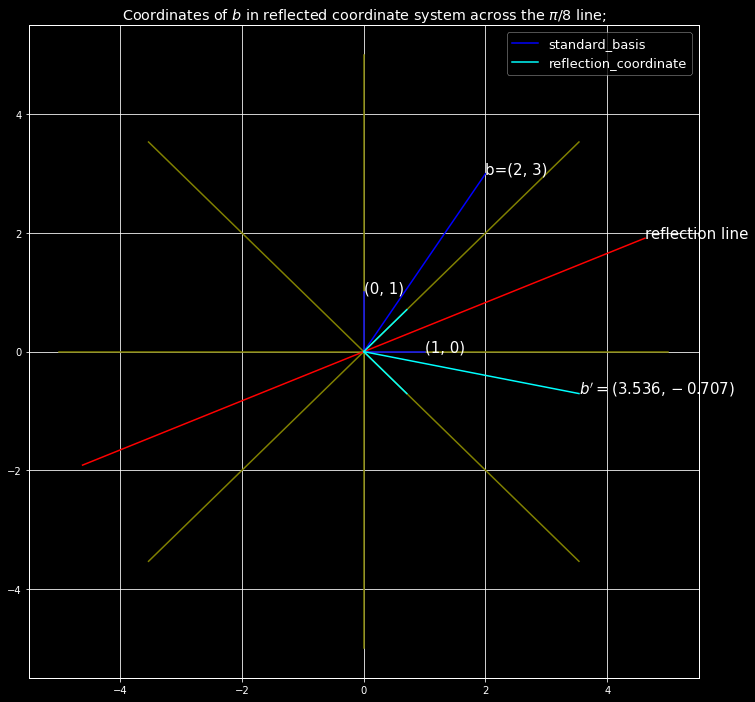

In [10]:
fig, ax = plt.subplots(figsize=(12, 12))
# original coordinates of b;
ax.plot([0, 0], [-5, 5], color="olive")
ax.plot([-5, 5], [0, 0], color="olive")
ax.plot([0, 0], [0, 1], color="blue", label="standard_basis")
ax.plot([0, 1], [0, 0], color="blue")
ax.plot([0, 2], [0, 3], color="blue")
ax.annotate(text="(0, 1)", xy=(0, 1), size=15)
ax.annotate(text="(1, 0)", xy=(1, 0), size=15)
ax.annotate(text="b=(2, 3)", xy=(2, 3), size=15)

# reflecting the axes (making a new coordinate system);
ax.plot([-reflected_x[0]*5, reflected_x[0]*5], 
        [-reflected_x[1]*5, reflected_x[1]*5], color="olive")
ax.plot([-reflected_y[0]*5, reflected_y[0]*5], 
        [-reflected_y[1]*5, reflected_y[1]*5], color="olive")
# the pi/8 line;
ax.plot([-np.cos(np.pi/8)*5, np.cos(np.pi/8)*5],
       [-np.sin(np.pi/8)*5, np.sin(np.pi/8)*5], color="red")
ax.annotate("reflection line", 
            xy=(np.cos(np.pi/8)*5, np.sin(np.pi/8)*5), size=15)
# representing the coordinates of b in the new reflected coordinate system;
ax.plot([0, reflected_x[0]], [0, reflected_x[1]], color="cyan", label="reflection_coordinate")
ax.plot([0, reflected_y[0]], [0, reflected_y[1]], color="cyan")
ax.plot([0, reflected_b_coords[0][0]], [0, reflected_b_coords[1][0]], color="cyan")
ax.annotate(f"$b'={reflected_b_coords[0][0].round(3), reflected_b_coords[1][0].round(3)}$",
           xy=(reflected_b_coords[0][0], reflected_b_coords[1][0]), size=15)
ax.set_title("Coordinates of $b$ in reflected coordinate system across the $\pi/8$ line;")
ax.legend(fontsize=13)
plt.show()

It is instructive to verify again that $R_2b_{reflected\_coord}=b$. Again, round to some number because we are comparing floating point numbers where precision matters.

In [11]:
assert all((R2 @ reflected_b_coords).round(5) == b)
(R2 @ reflected_b_coords).round(5) == b

array([[ True],
       [ True]])

More cool stuff:

In [12]:
print(f"determinant of the rotation matrix: {np.linalg.det(R1)}\n")
print(f"determinant of the reflection matrix: {np.linalg.det(R2)}")

determinant of the rotation matrix: 1.0

determinant of the reflection matrix: -1.0


Both matrices preserve "volumes" but the reflection matrix also reflects it along some axis (i.e., changing its sign). You can apply the reflection matrix two times to keep the vectors where they were originally.